### Movielens Case Study
DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
Domain: Entertainment

Analysis Tasks to be performed:

1.Import the three datasets
2.Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
3.Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
a)User Age Distribution
b)User rating of the movie “Toy Story”
c)Top 25 movies by viewership rating
d)Find the ratings for all the movies reviewed by for a particular user of user id = 2696


In [1]:
# !pip install pandas==1.0.5
# !pip install pandas-profiling==2.8.0

In [2]:
# Import the libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Analysis Tasks
1.Import the three datasets

In [3]:
### The data is in the form of .dat files, we use the below methods to load the data

movies = pd.read_csv('movies.dat',sep = '::',header = None,names= ['MovieID','Title','Genres'],engine = 'python')

ratings = pd.read_csv('ratings.dat',sep = '::',header = None,
                      names= ['UserID', 'MovieID' , 'Rating' , 'Timestamp'],engine = 'python')

user = pd.read_csv('users.dat',sep = '::',header = None,
                   names= ['UserID','Gender','Age','Occupation','Zipcode'],engine = 'python')


####  2.Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
(Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [4]:
merge = pd.merge(movies,ratings,how = 'outer', on = 'MovieID') ## (since MovieID is the column column in both the datsset)

In [5]:
merge.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,4.0,978237008.0
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,4.0,978233496.0
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,5.0,978225952.0
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,5.0,978226474.0


In [6]:
### Now merging the third dataset 
df = pd.merge(merge,user, how = 'outer', on = "UserID")

In [7]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067


In [8]:
df.columns.unique()

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode'],
      dtype='object')

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   MovieID     1000386 non-null  int64  
 1   Title       1000386 non-null  object 
 2   Genres      1000386 non-null  object 
 3   UserID      1000209 non-null  float64
 4   Rating      1000209 non-null  float64
 5   Timestamp   1000209 non-null  float64
 6   Gender      1000209 non-null  object 
 7   Age         1000209 non-null  float64
 8   Occupation  1000209 non-null  float64
 9   Zipcode     1000209 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 84.0+ MB


In [10]:
### There are null values in the dataset for the columns of UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode

In [11]:
df.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000386e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865526e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096030e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


### 3.Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
a)User Age Distribution

C:\Users\aradh.AJ-LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


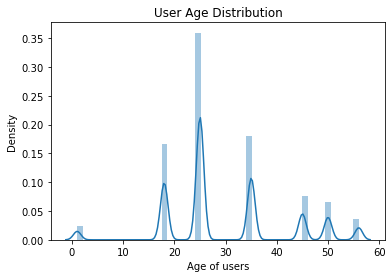

In [12]:
sns.distplot(df.Age)
plt.xlabel('Age of users')
plt.title('User Age Distribution')
plt.show()

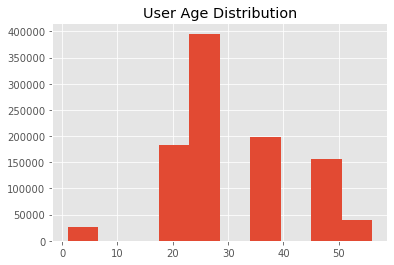

In [13]:
plt.style.use('ggplot')
plt.hist(df.Age, bins=10)
plt.title('User Age Distribution')
plt.show()

In [14]:
df["Age"].describe().round()

count    1000209.0
mean          30.0
std           12.0
min            1.0
25%           25.0
50%           25.0
75%           35.0
max           56.0
Name: Age, dtype: float64

### Observations
1. Avg age of the users is 30 years
2. Median age of the users is 25 years

### b)User rating of the movie “Toy Story”

In [15]:
df.columns.unique()

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode'],
      dtype='object')

In [16]:
group = df[['Rating','Title']].groupby(by=['Title'])
group.count()

,Rating
Title,
"$1,000,000 Duck (1971)",37
'Night Mother (1986),70
'Til There Was You (1997),52
"'burbs, The (1989)",303
...And Justice for All (1979),199
...,...
Zero Effect (1998),301
Zero Kelvin (Kjærlighetens kjøtere) (1995),2
Zeus and Roxanne (1997),23


In [17]:
toy_story = group.get_group("Toy Story (1995)")
toy_story

,Rating,Title
0,5.0,Toy Story (1995)
53,4.0,Toy Story (1995)
124,4.0,Toy Story (1995)
263,5.0,Toy Story (1995)
369,5.0,Toy Story (1995)
...,...,...
575166,5.0,Toy Story (1995)
575214,5.0,Toy Story (1995)
575485,4.0,Toy Story (1995)
575589,4.0,Toy Story (1995)


In [18]:
toy_story.max()

Rating                   5
Title     Toy Story (1995)
dtype: object

In [19]:
toy_story.min()

Rating                   1
Title     Toy Story (1995)
dtype: object

In [20]:
toy_story.mode()

,Rating,Title
0,4.0,Toy Story (1995)


### observation
The movie of Toy story has a most frequent rating = 4 from users

### c)Top 25 movies by viewership rating

In [21]:
df.columns.unique()

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode'],
      dtype='object')

In [22]:
df['Rating'].value_counts().head()

4.0    348971
3.0    261197
5.0    226310
2.0    107557
1.0     56174
Name: Rating, dtype: int64

In [23]:
top25= df.groupby('Title')['Rating'].mean().sort_values(ascending = False ).head(10)
top25.head()

Title
Gate of Heavenly Peace, The (1995)    5.0
Lured (1947)                          5.0
Ulysses (Ulisse) (1954)               5.0
Smashing Time (1967)                  5.0
Follow the Bitch (1998)               5.0
Name: Rating, dtype: float64

In [24]:
rating_count = df.groupby('Title')['Rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_count[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

### d)Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [25]:
df.columns.unique()

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode'],
      dtype='object')

In [26]:
user2696 = df[df["UserID"]==2696]
user2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode
991212,350,"Client, The (1994)",Drama|Mystery|Thriller,2696.0,3.0,973308886.0,M,25.0,7.0,24210
991213,800,Lone Star (1996),Drama|Mystery,2696.0,5.0,973308842.0,M,25.0,7.0,24210
991214,1092,Basic Instinct (1992),Mystery|Thriller,2696.0,4.0,973308886.0,M,25.0,7.0,24210
991215,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696.0,3.0,973308690.0,M,25.0,7.0,24210
991216,1258,"Shining, The (1980)",Horror,2696.0,4.0,973308710.0,M,25.0,7.0,24210
991217,1270,Back to the Future (1985),Comedy|Sci-Fi,2696.0,2.0,973308676.0,M,25.0,7.0,24210
991218,1589,Cop Land (1997),Crime|Drama|Mystery,2696.0,3.0,973308865.0,M,25.0,7.0,24210
991219,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696.0,4.0,973308842.0,M,25.0,7.0,24210
991220,1625,"Game, The (1997)",Mystery|Thriller,2696.0,4.0,973308842.0,M,25.0,7.0,24210
991221,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696.0,2.0,973308920.0,M,25.0,7.0,24210


In [27]:
user2696.value_counts()

MovieID  Title                                           Genres                            UserID  Rating  Timestamp    Gender  Age   Occupation  Zipcode
3386     JFK (1991)                                      Drama|Mystery                     2696.0  1.0     973308842.0  M       25.0  7.0         24210      1
3176     Talented Mr. Ripley, The (1999)                 Drama|Mystery|Thriller            2696.0  4.0     973308865.0  M       25.0  7.0         24210      1
800      Lone Star (1996)                                Drama|Mystery                     2696.0  5.0     973308842.0  M       25.0  7.0         24210      1
1092     Basic Instinct (1992)                           Mystery|Thriller                  2696.0  4.0     973308886.0  M       25.0  7.0         24210      1
1097     E.T. the Extra-Terrestrial (1982)               Children's|Drama|Fantasy|Sci-Fi   2696.0  3.0     973308690.0  M       25.0  7.0         24210      1
1258     Shining, The (1980)                       

### Feature Engineering:

Use column genres:

1.Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

In [28]:
genre = df["Genres"]
genre.unique()

array(["Animation|Children's|Comedy",
       "Animation|Children's|Musical|Romance", 'Drama',
       'Action|Adventure|Fantasy|Sci-Fi', 'Drama|War', "Children's|Drama",
       "Animation|Children's|Comedy|Musical",
       "Animation|Children's|Musical", 'Crime|Drama|Thriller',
       'Animation', 'Animation|Comedy|Thriller', 'Musical|Romance',
       "Adventure|Children's|Drama|Musical", 'Musical',
       "Children's|Comedy|Musical", "Children's|Drama|Fantasy|Sci-Fi",
       'Action|Adventure|Comedy|Romance', 'Comedy|Sci-Fi',
       'Action|Adventure|Drama',
       "Adventure|Animation|Children's|Comedy|Musical", 'Drama|Romance',
       "Animation|Children's", 'Action|Drama|War', 'Comedy', 'Romance',
       'Action|Crime|Romance', 'Thriller', 'Comedy|Fantasy',
       'Comedy|Drama', "Children's|Comedy|Drama", 'Drama|Musical',
       'Drama|Romance|War|Western', 'Crime|Drama',
       'Action|Comedy|Western', 'Action|Romance|Thriller', 'Western',
       "Children's|Comedy", 'Adventure|Dr

In [29]:
genre.nunique()

301

### Observation:
There are total 301 genres present in the dataset

#### 2.Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [30]:
genre_OneHot = df['Genres'].str.get_dummies("|")
genre_OneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [31]:
df1 = pd.concat([df,genre_OneHot],axis=1)
df1
### new_data = pd.concat([df,df.Genres.str.get_dummies()], axis=1)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,F,1.0,10.0,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,F,1.0,10.0,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,F,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),Drama|Thriller,5727.0,4.0,958489970.0,M,25.0,4.0,92843,...,0,0,0,0,0,0,0,1,0,0
1000382,3535,American Psycho (2000),Comedy|Horror|Thriller,5727.0,2.0,958489970.0,M,25.0,4.0,92843,...,0,0,1,0,0,0,0,1,0,0
1000383,3536,Keeping the Faith (2000),Comedy|Romance,5727.0,5.0,958489902.0,M,25.0,4.0,92843,...,0,0,0,0,0,1,0,0,0,0
1000384,3555,U-571 (2000),Action|Thriller,5727.0,3.0,958490699.0,M,25.0,4.0,92843,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df1.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zipcode', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [33]:
###Encoding the gender column

df1.Gender = pd.get_dummies(df1.Gender)
print(df1.Gender)

0          1
1          1
2          1
3          1
4          1
          ..
1000381    0
1000382    0
1000383    0
1000384    0
1000385    0
Name: Gender, Length: 1000386, dtype: uint8


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   MovieID      1000386 non-null  int64  
 1   Title        1000386 non-null  object 
 2   Genres       1000386 non-null  object 
 3   UserID       1000209 non-null  float64
 4   Rating       1000209 non-null  float64
 5   Timestamp    1000209 non-null  float64
 6   Gender       1000386 non-null  uint8  
 7   Age          1000209 non-null  float64
 8   Occupation   1000209 non-null  float64
 9   Zipcode      1000209 non-null  object 
 10  Action       1000386 non-null  int64  
 11  Adventure    1000386 non-null  int64  
 12  Animation    1000386 non-null  int64  
 13  Children's   1000386 non-null  int64  
 14  Comedy       1000386 non-null  int64  
 15  Crime        1000386 non-null  int64  
 16  Documentary  1000386 non-null  int64  
 17  Drama        1000386 non-null  int64  
 18  Fa

### 3.Determine the features affecting the ratings of any particular movie.
##### since the columns of UserID','MovieID','Rating are not considering now
4.Develop an appropriate model to predict the movie ratings

<AxesSubplot:>

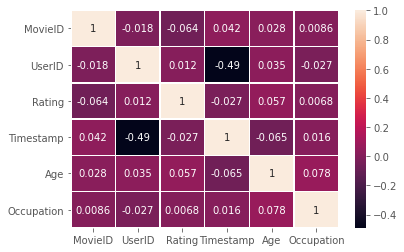

In [35]:
corr = df.corr()
sns.heatmap(corr,annot= True,linewidths=0.5)

In [36]:
x = df1.drop(['UserID','MovieID','Rating'],axis=1)
x.shape

(1000386, 25)

In [37]:
print('The features affecting the ratings of any particular movie:')
print()
print(x.columns)

The features affecting the ratings of any particular movie:

Index(['Title', 'Genres', 'Timestamp', 'Gender', 'Age', 'Occupation',
       'Zipcode', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [38]:
x.Occupation.value_counts()

4.0     131032
0.0     130499
7.0     105425
1.0      85351
17.0     72816
20.0     60397
12.0     57214
2.0      50068
14.0     49109
16.0     46021
6.0      37205
3.0      31623
10.0     23290
15.0     22951
5.0      21850
11.0     20563
19.0     14904
13.0     13754
18.0     12086
9.0      11345
8.0       2706
Name: Occupation, dtype: int64

In [39]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(                                       Title  \
 0                           Toy Story (1995)   
 1                          Pocahontas (1995)   
 2                           Apollo 13 (1995)   
 3  Star Wars: Episode IV - A New Hope (1977)   
 4                    Schindler's List (1993)   
 
                                  Genres    Timestamp  Gender  Age  Occupation  \
 0           Animation|Children's|Comedy  978824268.0       1  1.0        10.0   
 1  Animation|Children's|Musical|Romance  978824351.0       1  1.0        10.0   
 2                                 Drama  978301777.0       1  1.0        10.0   
 3       Action|Adventure|Fantasy|Sci-Fi  978300760.0       1  1.0        10.0   
 4                             Drama|War  978824195.0       1  1.0        10.0   
 
   Zipcode  Action  Adventure  Animation  ...  Occupation_11.0  \
 0   48067       0          0          1  ...                0   
 1   48067       0          0          1  ...                0   
 2   48067  

In [40]:
x = x.drop(['Occupation','Occupation_0.0'],axis=1)
x.head(3),x.shape

(               Title                                Genres    Timestamp  \
 0   Toy Story (1995)           Animation|Children's|Comedy  978824268.0   
 1  Pocahontas (1995)  Animation|Children's|Musical|Romance  978824351.0   
 2   Apollo 13 (1995)                                 Drama  978301777.0   
 
    Gender  Age Zipcode  Action  Adventure  Animation  Children's  ...  \
 0       1  1.0   48067       0          0          1           1  ...   
 1       1  1.0   48067       0          0          1           1  ...   
 2       1  1.0   48067       0          0          0           0  ...   
 
    Occupation_11.0  Occupation_12.0  Occupation_13.0  Occupation_14.0  \
 0                0                0                0                0   
 1                0                0                0                0   
 2                0                0                0                0   
 
    Occupation_15.0  Occupation_16.0  Occupation_17.0  Occupation_18.0  \
 0                0     

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import LabelEncoder

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000386 entries, 0 to 1000385
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   MovieID      1000386 non-null  int64  
 1   Title        1000386 non-null  object 
 2   Genres       1000386 non-null  object 
 3   UserID       1000209 non-null  float64
 4   Rating       1000209 non-null  float64
 5   Timestamp    1000209 non-null  float64
 6   Gender       1000386 non-null  uint8  
 7   Age          1000209 non-null  float64
 8   Occupation   1000209 non-null  float64
 9   Zipcode      1000209 non-null  object 
 10  Action       1000386 non-null  int64  
 11  Adventure    1000386 non-null  int64  
 12  Animation    1000386 non-null  int64  
 13  Children's   1000386 non-null  int64  
 14  Comedy       1000386 non-null  int64  
 15  Crime        1000386 non-null  int64  
 16  Documentary  1000386 non-null  int64  
 17  Drama        1000386 non-null  int64  
 18  Fa

In [43]:
df1.isnull()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000382,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000383,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000384,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
df1.dropna()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,5.0,978824268.0,1,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1.0,5.0,978824351.0,1,1.0,10.0,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1.0,5.0,978301777.0,1,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1.0,4.0,978300760.0,1,1.0,10.0,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1.0,5.0,978824195.0,1,1.0,10.0,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000381,3513,Rules of Engagement (2000),Drama|Thriller,5727.0,4.0,958489970.0,0,25.0,4.0,92843,...,0,0,0,0,0,0,0,1,0,0
1000382,3535,American Psycho (2000),Comedy|Horror|Thriller,5727.0,2.0,958489970.0,0,25.0,4.0,92843,...,0,0,1,0,0,0,0,1,0,0
1000383,3536,Keeping the Faith (2000),Comedy|Romance,5727.0,5.0,958489902.0,0,25.0,4.0,92843,...,0,0,0,0,0,1,0,0,0,0
1000384,3555,U-571 (2000),Action|Thriller,5727.0,3.0,958490699.0,0,25.0,4.0,92843,...,0,0,0,0,0,0,0,1,0,0


In [45]:
y = df1.Rating
y.shape


(1000386,)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

lineReg = LinearRegression(
    copy_X=True,
    fit_intercept=True,
    n_jobs=1,
    normalize=False
)

In [48]:
df1 = df1.sample(
    n=50000,
    random_state=0
)
df1.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zipcode,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
291664,1274,Akira (1988),Adventure|Animation|Sci-Fi|Thriller,3163.0,5.0,9.688677e+08,0,18.0,15.0,95616,...,0,0,0,0,0,0,1,1,0,0
663449,1387,Jaws (1975),Action|Horror,1194.0,5.0,1.036308e+09,1,25.0,1.0,95617,...,0,0,1,0,0,0,0,0,0,0
473574,3129,Sweet and Lowdown (1999),Comedy|Drama,4916.0,4.0,9.626761e+08,0,18.0,20.0,85054,...,0,0,0,0,0,0,0,0,0,0
676421,1222,Full Metal Jacket (1987),Action|Drama|War,3044.0,5.0,9.702104e+08,0,35.0,16.0,77301,...,0,0,0,0,0,0,0,0,1,0
298416,353,"Crow, The (1994)",Action|Romance|Thriller,3259.0,4.0,9.913616e+08,1,18.0,4.0,95616,...,0,0,0,0,0,1,0,1,0,0


In [49]:
x = df1.drop('Rating', axis=1)
y = df1['Rating']

In [50]:
x.shape

(50000, 27)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.20,
    random_state=0
)

In [54]:
linear_reg = LinearRegression()

In [ ]:
## linear_reg.fit(x_train, y_train)
## y_pred = linear_reg.predict(x_test)
print(
    'y-intercept: ',
    linear_reg.intercept_
)
print(
    'Beta coefficients: ',
    linear_reg.coef_
)
print(
    'Mean Abs Error  MAE: ',
    metrics.mean_absolute_error(y_test, y_pred)
)
print(
    'Mean Sq Error  MSE: ',
    metrics.mean_squared_error(y_test, y_pred)
)
print(
    'Root Mean Sq Error RMSE:',
    np.sqrt(metrics.mean_squared_error(y_test, y_pred))
)
print(
    'r2 value: ',
    metrics.r2_score(y_test, y_pred)
)

In [ ]:

x_train.dtypes

prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})
prediction_df.head()

In [ ]:
https://github.com/vrushalibhokare/Data-Science-Project--Movielens-case-study/blob/master/Movielens%20Case%20Study.ipynb

In [ ]:
https://github.com/MohammedAlawami/Movielens-Dataset/blob/master/movielens_project.ipynb

In [ ]:
https://github.com/Deepak-Shankar/Movielens-Case-Study/blob/master/Movielens-Case-Study_project.ipynb